# Importing libraries

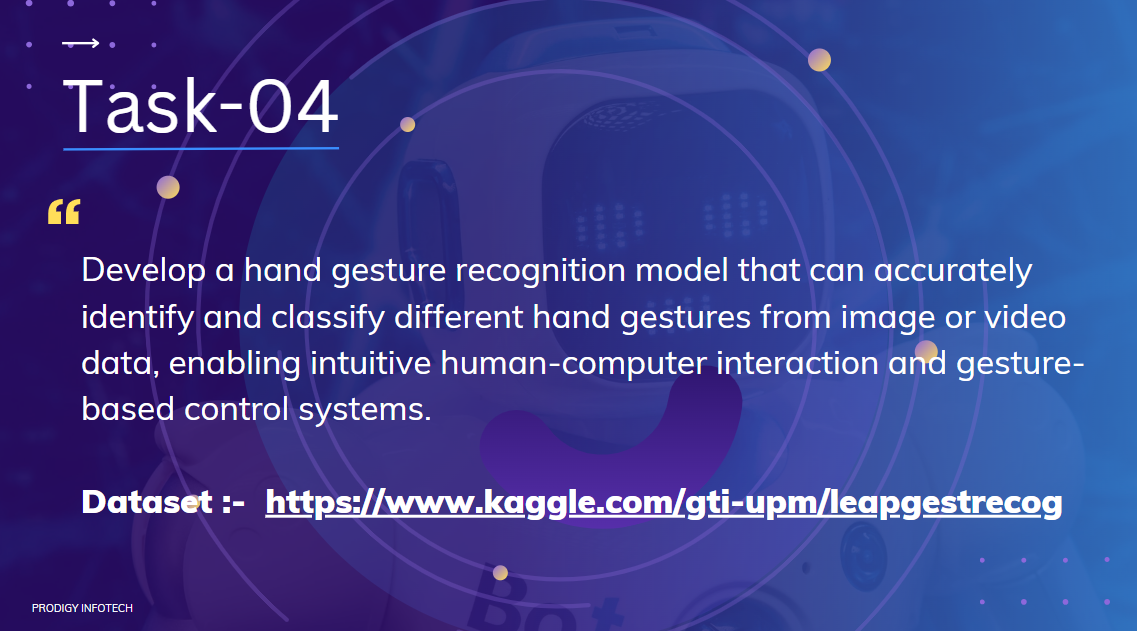

In [16]:
import os
import numpy as np
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
dataset_path = 'C:/Users/PC/Desktop/Prodigy Infotech Machine Learning Internship/Hand_Gesture_Recognision/leapGestRecog'
data = []
labels = []

gesture_classes = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

In [10]:
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for gesture in gesture_classes:
            gesture_path = os.path.join(folder_path, gesture)
            if os.path.isdir(gesture_path):
                for img_name in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
                    img = cv2.resize(img, (64, 64)) 
                    data.append(img.flatten()) 
                    labels.append(gesture_classes.index(gesture))  

In [11]:
data = np.array(data)
labels = np.array(labels)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Random Forest

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_train_pred =model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy : {train_accuracy * 100:.2f}%")
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train accuracy : 100.00%
Test Accuracy: 100.00%


# Support Vector Machine

In [15]:
svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train, y_train)

y_train_pred_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print(f"SVM Train Accuracy: {train_accuracy_svm * 100:.2f}%")

y_test_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy: {test_accuracy_svm * 100:.2f}%")


SVM Train Accuracy: 100.00%
SVM Test Accuracy: 100.00%


# Logistic Regression

In [17]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

logreg_model.fit(X_train, y_train)

y_train_pred_logreg = logreg_model.predict(X_train)
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
print(f"Logistic Regression Train Accuracy: {train_accuracy_logreg * 100:.2f}%")

y_test_pred_logreg = logreg_model.predict(X_test)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg * 100:.2f}%")


Logistic Regression Train Accuracy: 100.00%
Logistic Regression Test Accuracy: 99.83%
